# Loading packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
import pandas as pd
import PIL.Image
import collections

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
session_conf = tf.compat.v1.ConfigProto(
      intra_op_parallelism_threads=10,
      inter_op_parallelism_threads=0)
sess = tf.compat.v1.Session(config=session_conf)

In [3]:
# all_info = pd.read_csv("/content/drive/MyDrive/GitHub_Projects/plane_variants/img/all_info.csv")
all_info = pd.read_csv("./img/all_info.csv")
all_info.sample(10)

,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,variant
2222,Airbus A330-343,Cebu Pacific Air,Photo date: 2019-11-20,Uploaded: 2021-06-13,"Location: Tokyo Narita Int'l Airport - RJAA, J...",By: Lorenzo Varin,cdn.jetphotos.com/400/6/44264_1622446814.jpg,./img/A330/cdn.jetphotos.com-400-6-44264_16224...,A330,343
27151,Boeing 787-9 Dreamliner,KLM Royal Dutch Airlines,Photo date: 2021-05-26,Uploaded: 2021-06-14,Location: Hong Kong-Chek Lap Kok Int'l Airport...,By: Adrian Tong,cdn.jetphotos.com/400/6/72604_1622491494.jpg,./img/B787/cdn.jetphotos.com-400-6-72604_16224...,B787,9
19313,Airbus A380-861,Emirates,Photo date: 2018-12-28,Uploaded: 2021-02-14,"Location: Brisbane Int'l Airport - YBBN, Austr...",By: Charles Cunliffe,cdn.jetphotos.com/400/5/31796_1612868521.jpg,./img/A380/cdn.jetphotos.com-400-5-31796_16128...,A380,861
32078,Boeing 747-8B5,Korean Air,Photo date: 2019-09-16,Uploaded: 2021-05-23,"Location: Prague Václav Havel Int'l - LKPR, Cz...",By: Frolov Sergey,cdn.jetphotos.com/400/6/46345_1620905791.jpg,./img/B747/cdn.jetphotos.com-400-6-46345_16209...,B747,8B5
9396,Airbus A380-861,Korean Air,Photo date: 2020-02-16,Uploaded: 2020-12-14,Location: Sydney Kingsford Smith Int'l Airport...,By: Yohane,cdn.jetphotos.com/400/6/44990_1607551511.jpg,./img/A380/cdn.jetphotos.com-400-6-44990_16075...,A380,861
18757,Airbus A380-861,Emirates,Photo date: 2018-01-08,Uploaded: 2021-06-05,Location: Manchester Ringway Int'l Airport - E...,By: Dave Henderson,cdn.jetphotos.com/400/5/85276_1621715842.jpg,./img/A380/cdn.jetphotos.com-400-5-85276_16217...,A380,861
14830,Airbus A340-313X,SpiceXpress (HiFly Malta),Photo date: 2021-04-25,Uploaded: 2021-05-08,Location: Frankfurt Rhein-Main Int'l Airport -...,By: Daniel Klein,cdn.jetphotos.com/400/6/92830_1619636549.jpg,./img/A340/cdn.jetphotos.com-400-6-92830_16196...,A340,313X
30588,Boeing 737-8H4,Southwest Airlines,Photo date: 2019-10-30,Uploaded: 2021-06-05,Location: Las Vegas McCarran Int'l Airport - K...,By: Michael Walter,cdn.jetphotos.com/400/6/36684_1621697816.jpg,./img/B737/cdn.jetphotos.com-400-6-36684_16216...,B737,8H4
22964,Boeing 747-4HAERF,Air Bridge Cargo,Photo date: 2021-05-25,Uploaded: 2021-06-14,"Location: Milano Malpensa - LIMC, Italy",By: Raoul Andries,cdn.jetphotos.com/400/6/76871_1622493818.jpg,./img/B747/cdn.jetphotos.com-400-6-76871_16224...,B747,4HAERF
120,Airbus A320-214,Peach Aviation,Photo date: 2021-05-31,Uploaded: 2021-06-14,"Location: Tokyo Narita Int'l Airport - RJAA, J...",By: Daisuke,cdn.jetphotos.com/400/5/92227_1622552919.jpg,./img/A320/cdn.jetphotos.com-400-5-92227_16225...,A320,214


In [4]:
# all_info.loc[:, "download_path"] = all_info.download_path.str.replace("\\./", "/content/drive/MyDrive/GitHub_Projects/plane_variants/")
all_info_rows = all_info.shape[0]
np.random.seed(10)
all_info["purpose"] = np.random.choice(["train", "test", "validation"], size=all_info_rows, replace=True, p=[0.64, 0.16, 0.2])
a380vb747 = all_info.loc[all_info.model.isin(["A380", "B747", "B787"])].reset_index()
a380vb747.head()

,index,long_model,airline,photo_date,uploaded_date,location,uploader,photo_link,download_path,model,variant,purpose
0,8320,Airbus A380-861,Emirates,Photo date: 2021-05-30,Uploaded: 2021-06-15,Location: Manchester Ringway Int'l Airport - E...,By: Paul Spijkers,cdn.jetphotos.com/400/5/68077_1622647548.jpg,./img/A380/cdn.jetphotos.com-400-5-68077_16226...,A380,861,train
1,8321,Airbus A380-861,Emirates,Photo date: 2021-04-10,Uploaded: 2021-06-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: ChaleLu,cdn.jetphotos.com/400/6/75937_1622641760.jpg,./img/A380/cdn.jetphotos.com-400-6-75937_16226...,A380,861,test
2,8322,Airbus A380-841,China Southern Airlines,Photo date: 2021-05-19,Uploaded: 2021-06-15,"Location: Guangzhou Baiyun Airport - ZGGG, China",By: Fang Xiaoyu,cdn.jetphotos.com/400/6/74070_1622628386.jpg,./img/A380/cdn.jetphotos.com-400-6-74070_16226...,A380,841,validation
3,8323,Airbus A380-841,Singapore Airlines,Photo date: 2019-09-02,Uploaded: 2021-06-15,"Location: Zurich-Kloten Airport - LSZH, Switze...",By: Nguyen Huy Bao,cdn.jetphotos.com/400/5/32090_1622625012.jpg,./img/A380/cdn.jetphotos.com-400-5-32090_16226...,A380,841,train
4,8324,Airbus A380-841,British Airways,Photo date: 2019-04-19,Uploaded: 2021-06-15,"Location: London Heathrow Int'l - EGLL, United...",By: Simon Fewkes,cdn.jetphotos.com/400/5/60639_1622620557.jpg,./img/A380/cdn.jetphotos.com-400-5-60639_16226...,A380,841,validation


In [5]:
train_df = a380vb747.loc[a380vb747.purpose == "train"]
test_df = a380vb747.loc[a380vb747.purpose == "test"]
validation_df = a380vb747.loc[a380vb747.purpose == "validation"]
print(train_df.download_path.head())

0    ./img/A380/cdn.jetphotos.com-400-5-68077_16226...
3    ./img/A380/cdn.jetphotos.com-400-5-32090_16226...
6    ./img/A380/cdn.jetphotos.com-400-5-56656_16225...
7    ./img/A380/cdn.jetphotos.com-400-6-26438_16224...
8    ./img/A380/cdn.jetphotos.com-400-6-68200_16224...
Name: download_path, dtype: object


In [6]:
train_df.download_path[0]

'./img/A380/cdn.jetphotos.com-400-5-68077_1622647548.jpg'

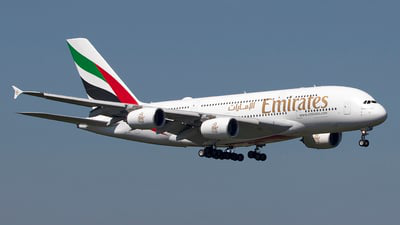

In [7]:
PIL.Image.open(str(train_df.download_path[0]))

In [12]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=prep_fn)

IMG_SIZE = (225, 400)

train_dataset = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=1234)

test_dataset = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=1234)

validation_dataset = validation_datagen.flow_from_dataframe(
    dataframe=validation_df,
    directory=None,
    x_col="download_path",
    y_col="model",
    target_size=IMG_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=1234)

Found 7964 validated image filenames belonging to 3 classes.
Found 1990 validated image filenames belonging to 3 classes.
Found 2526 validated image filenames belonging to 3 classes.


In [13]:
print(collections.Counter(train_dataset.labels))

Counter({2: 2691, 0: 2656, 1: 2617})


In [14]:
train_dataset[0][0].shape

(32, 225, 400, 3)

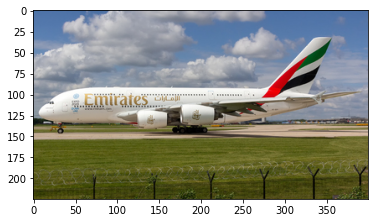

In [15]:
plt.imshow(((train_dataset[0][0][0,:,:,:])+1)/2)
plt.show()

In [16]:
print(np.max(train_dataset[0][0][0,:,:,:]))
print(np.min(train_dataset[0][0][0,:,:,:]))

1.0
-1.0


In [17]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [18]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 8, 13, 1280)


# Feature extraction

In [19]:
base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 225, 400, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 113, 200, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 113, 200, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 113, 200, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [21]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

inputs = tf.keras.Input(shape=(225, 400, 3))
# x = data_augmentation(inputs)
# x = preprocess_input(x)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 225, 400, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 225, 400, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 225, 400, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 8, 13, 1280)       2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281  

/home/u0037678/.conda/envs/env_cap/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Initial training

In [23]:
initial_epochs = 3

loss0, accuracy0 = model.evaluate(validation_dataset)

79/79 [==============================] - 25s 306ms/step - loss: 0.7741 - accuracy: 0.6560


In [24]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/3
249/249 [==============================] - 99s 390ms/step - loss: 0.6678 - accuracy: 0.6608 - val_loss: 0.6371 - val_accuracy: 0.6667
Epoch 2/3
249/249 [==============================] - 97s 388ms/step - loss: 0.6609 - accuracy: 0.6651 - val_loss: 0.6378 - val_accuracy: 0.6667
Epoch 3/3
249/249 [==============================] - 95s 381ms/step - loss: 0.6578 - accuracy: 0.6661 - val_loss: 0.6369 - val_accuracy: 0.6667


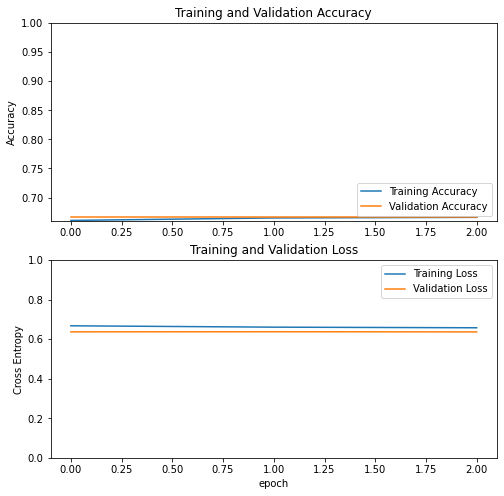

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine tuning

In [25]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
model.summary()
len(model.trainable_variables)

Number of layers in the base model:  154
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 225, 400, 3)]     0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 225, 400, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 225, 400, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 8, 13, 1280)       2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)       

56

In [26]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 3/13
249/249 [==============================] - 152s 599ms/step - loss: 0.6399 - accuracy: 0.6663 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 4/13
249/249 [==============================] - 147s 589ms/step - loss: 0.6370 - accuracy: 0.6667 - val_loss: 0.6369 - val_accuracy: 0.6667
Epoch 5/13
249/249 [==============================] - 149s 596ms/step - loss: 0.6369 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667
Epoch 6/13
249/249 [==============================] - 147s 589ms/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 7/13
249/249 [==============================] - 167s 671ms/step - loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 8/13
249/249 [==============================] - 156s 625ms/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6366 - val_accuracy: 0.6667
Epoch 9/13
249/249 [==============================] - 149s 596ms/step - loss: 0.6367 - accuracy: 0.6667 - val_loss: 0.6366 -

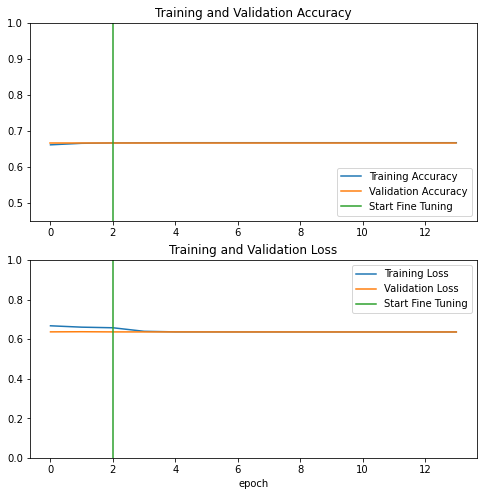

In [29]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.45, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

22/22 [==============================] - 37s 2s/step - loss: 0.2778 - accuracy: 0.8825
Test accuracy : 0.8825256824493408


In [ ]:
model.save('/content/a380vb787_dataframemodel')

INFO:tensorflow:Assets written to: /content/a380vb787_dataframemodel/assets


In [ ]:
!zip -r /content/a380vb787_dataframemodel.zip /content/a380vb787_dataframemodel/

  adding: content/a380vb787_dataframemodel/ (stored 0%)
  adding: content/a380vb787_dataframemodel/keras_metadata.pb (deflated 96%)
  adding: content/a380vb787_dataframemodel/variables/ (stored 0%)
  adding: content/a380vb787_dataframemodel/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/a380vb787_dataframemodel/variables/variables.index (deflated 77%)
  adding: content/a380vb787_dataframemodel/assets/ (stored 0%)
  adding: content/a380vb787_dataframemodel/saved_model.pb (deflated 92%)
